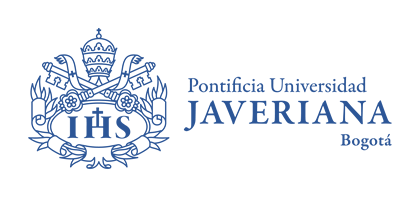

# Introducción a la IA - Proyecto

## Integrantes
- Andrés García Montoya
- Nicolás David Rincón Ballesteros
- Iván Darío Orozco

In [1]:
#!pip install -r requirements.txt

# Importar librerías

In [4]:
import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.
from sklearn.linear_model import Perceptron                        # Para construir un modelo de perceptrón.

import pandas as pd                                                # Para manipulación de datos, CSV I/O (e.g. pd.read_csv).
import numpy as np                                                 # Para álgebra linear (Operaciones de matrices).
import tensorflow as tf                                             # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow import keras                                        # Para construir y entrenar modelos de aprendizaje profundo.
from tensorflow.keras import layers                                 # Para construir y entrenar modelos de aprendizaje profundo.
import matplotlib.pyplot as plt                                    # Para visualización de datos.
import seaborn as sns                                              # Para visualización de datos.
from ucimlrepo import fetch_ucirepo                                # Para obtener datasets de UCI Machine Learning Repository.
from sklearn.preprocessing import StandardScaler                   # Para normalizar los datos.
from sklearn.model_selection import train_test_split               # Para dividir los datos en conjuntos de entrenamiento y pruebas.
from sklearn.metrics import accuracy_score, classification_report   # Para evaluar el rendimiento del modelo.

# Paso 1: Cargar el dataset

In [136]:
# Se cargan los datos del dataset de vinos desde un archivo CSV.
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# **Paso 2: Comprensión del dataset**

In [6]:
# Información general del dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# Estadísticas descriptivas del dataset
df_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Resumen

Wine Quality Dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 6497

    :Number of Attributes: 13 (12 numeric features and 1 target)

    :Attribute Information:
        - fixed_acidity
        - volatile_acidity
        - citric_acid
        - residual_sugar
        - chlorides
        - free_sulfur_dioxide
        - total_sulfur_dioxide
        - density
        - pH
        - sulphates
        - alcohol
        - quality (score between 0 and 10)
        - color (red or white)

    :Summary Statistics:

    ===================================== ======
                                           Min    Max
    ===================================== ====== ======
    fixed_acidity                          3.8    14.2
    volatile_acidity                       0.08   1.58
    citric_acid                            0.0    1.0
    residual_sugar                         0.6    65.8
    chlorides                              0.012  0.611
    free_sulfur_dioxide                    1.0    289.0
    total_sulfur_dioxide                   6.0    440.0
    density                                0.9901 1.0037
    pH                                     2.72   4.01
    sulphates                              0.22   2.0
    alcohol                                8.4    14.9
    quality                                3      9
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution:
        - Quality 0 to 6: 63 instances
        - Quality 6 to 9: 1319 instances

    :Creator: Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
    :Donor: Paulo Cortez (pcortez@ics.uminho.pt), Antonio Cerdeira, Fernando Almeida, Telmo Matos and José Reis (see also http://www3.dsi.uminho.pt/pcortez)

    :Date: March, 2009

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality

.. topic:: References

   - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
   - S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.

## Análisis Gráfico

## Imprimimos las frecuencias de la variable objetivo

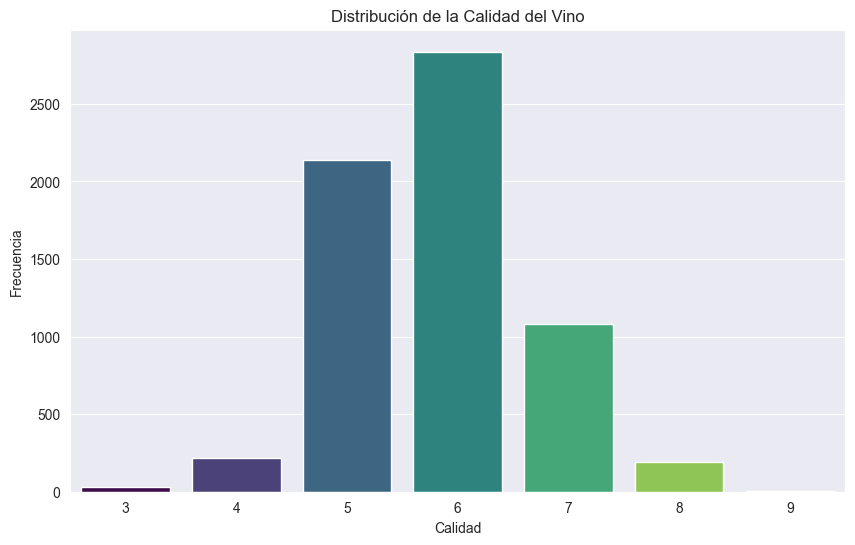

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df_wine, hue='quality', palette='viridis', dodge=False, legend=False)
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

## Imprimimos las distribuciones de las variables

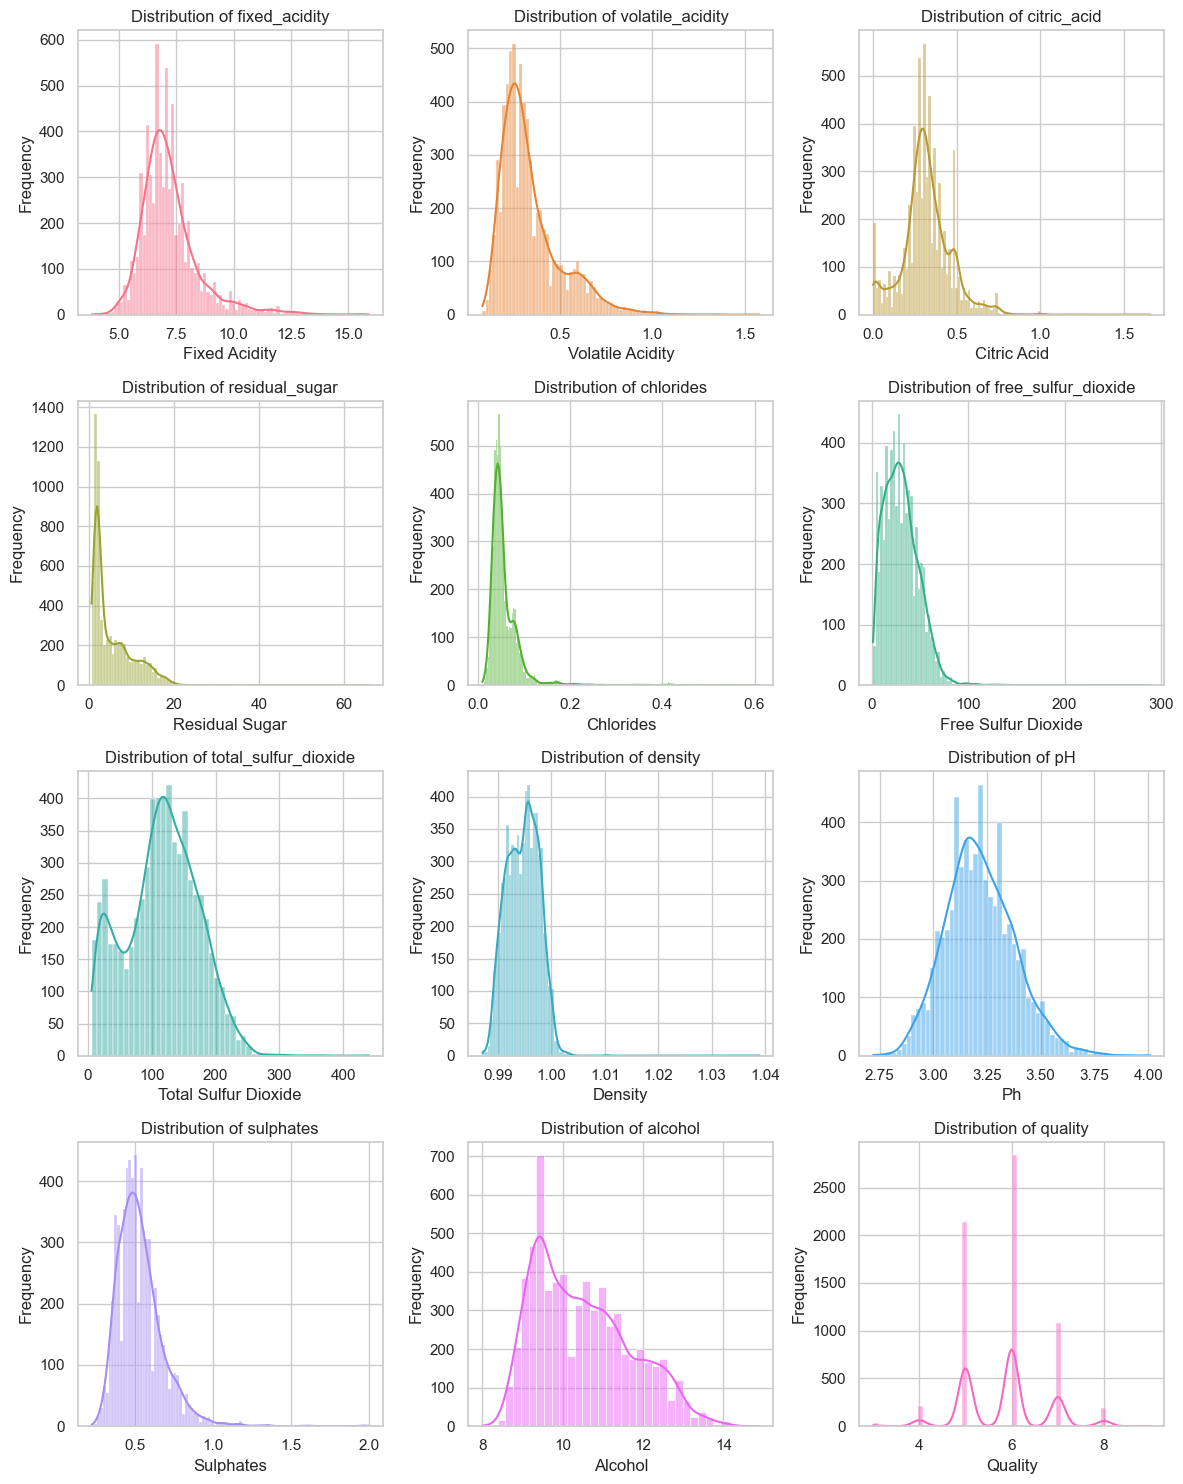

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de visualización
sns.set(style="whitegrid")

# Variables seleccionadas
variables = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Definir paleta de colores
palette = sns.color_palette("husl", len(variables))

# Histogramas para variables seleccionadas
fig, axs = plt.subplots(4, 3, figsize=(12, 15))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    sns.histplot(df_wine[var], kde=True, ax=axs[row, col], color=palette[i])
    axs[row, col].set_title(f'Distribution of {var}')
    axs[row, col].set_xlabel(var.replace('_', ' ').title())
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Imprimimos la matriz de correlación de las variables

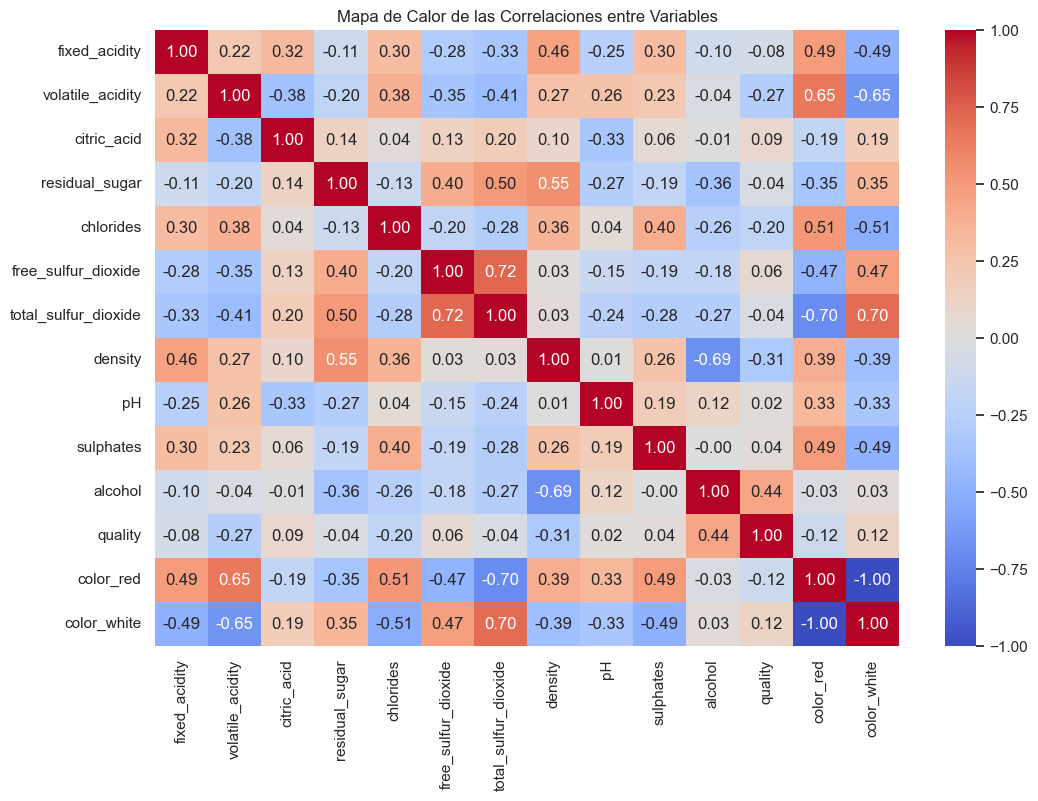

In [13]:
df_dummed = pd.get_dummies(df_wine, columns=['color'])
correlation_matrix = df_dummed.corr()

# Graficar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de las Correlaciones entre Variables')
plt.show()

# **Paso 3: pre procesamiento**

### Dumificación de variables categóricas

In [29]:
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [137]:
# Dumificación de la variable categórica 'color'
df_wine = pd.get_dummies(df_wine, columns=['color'])
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True,False


### Tratamiento de valores nulos

In [46]:
# Verificar la existencia de valores nulos (no hay)
print(df_wine.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color_red               0
color_white             0
dtype: int64


No hay valores nulos en el dataset, por lo que no es necesario realizar el proceso de eliminación de valores nulos.

### Tratamiento de valores atípicos

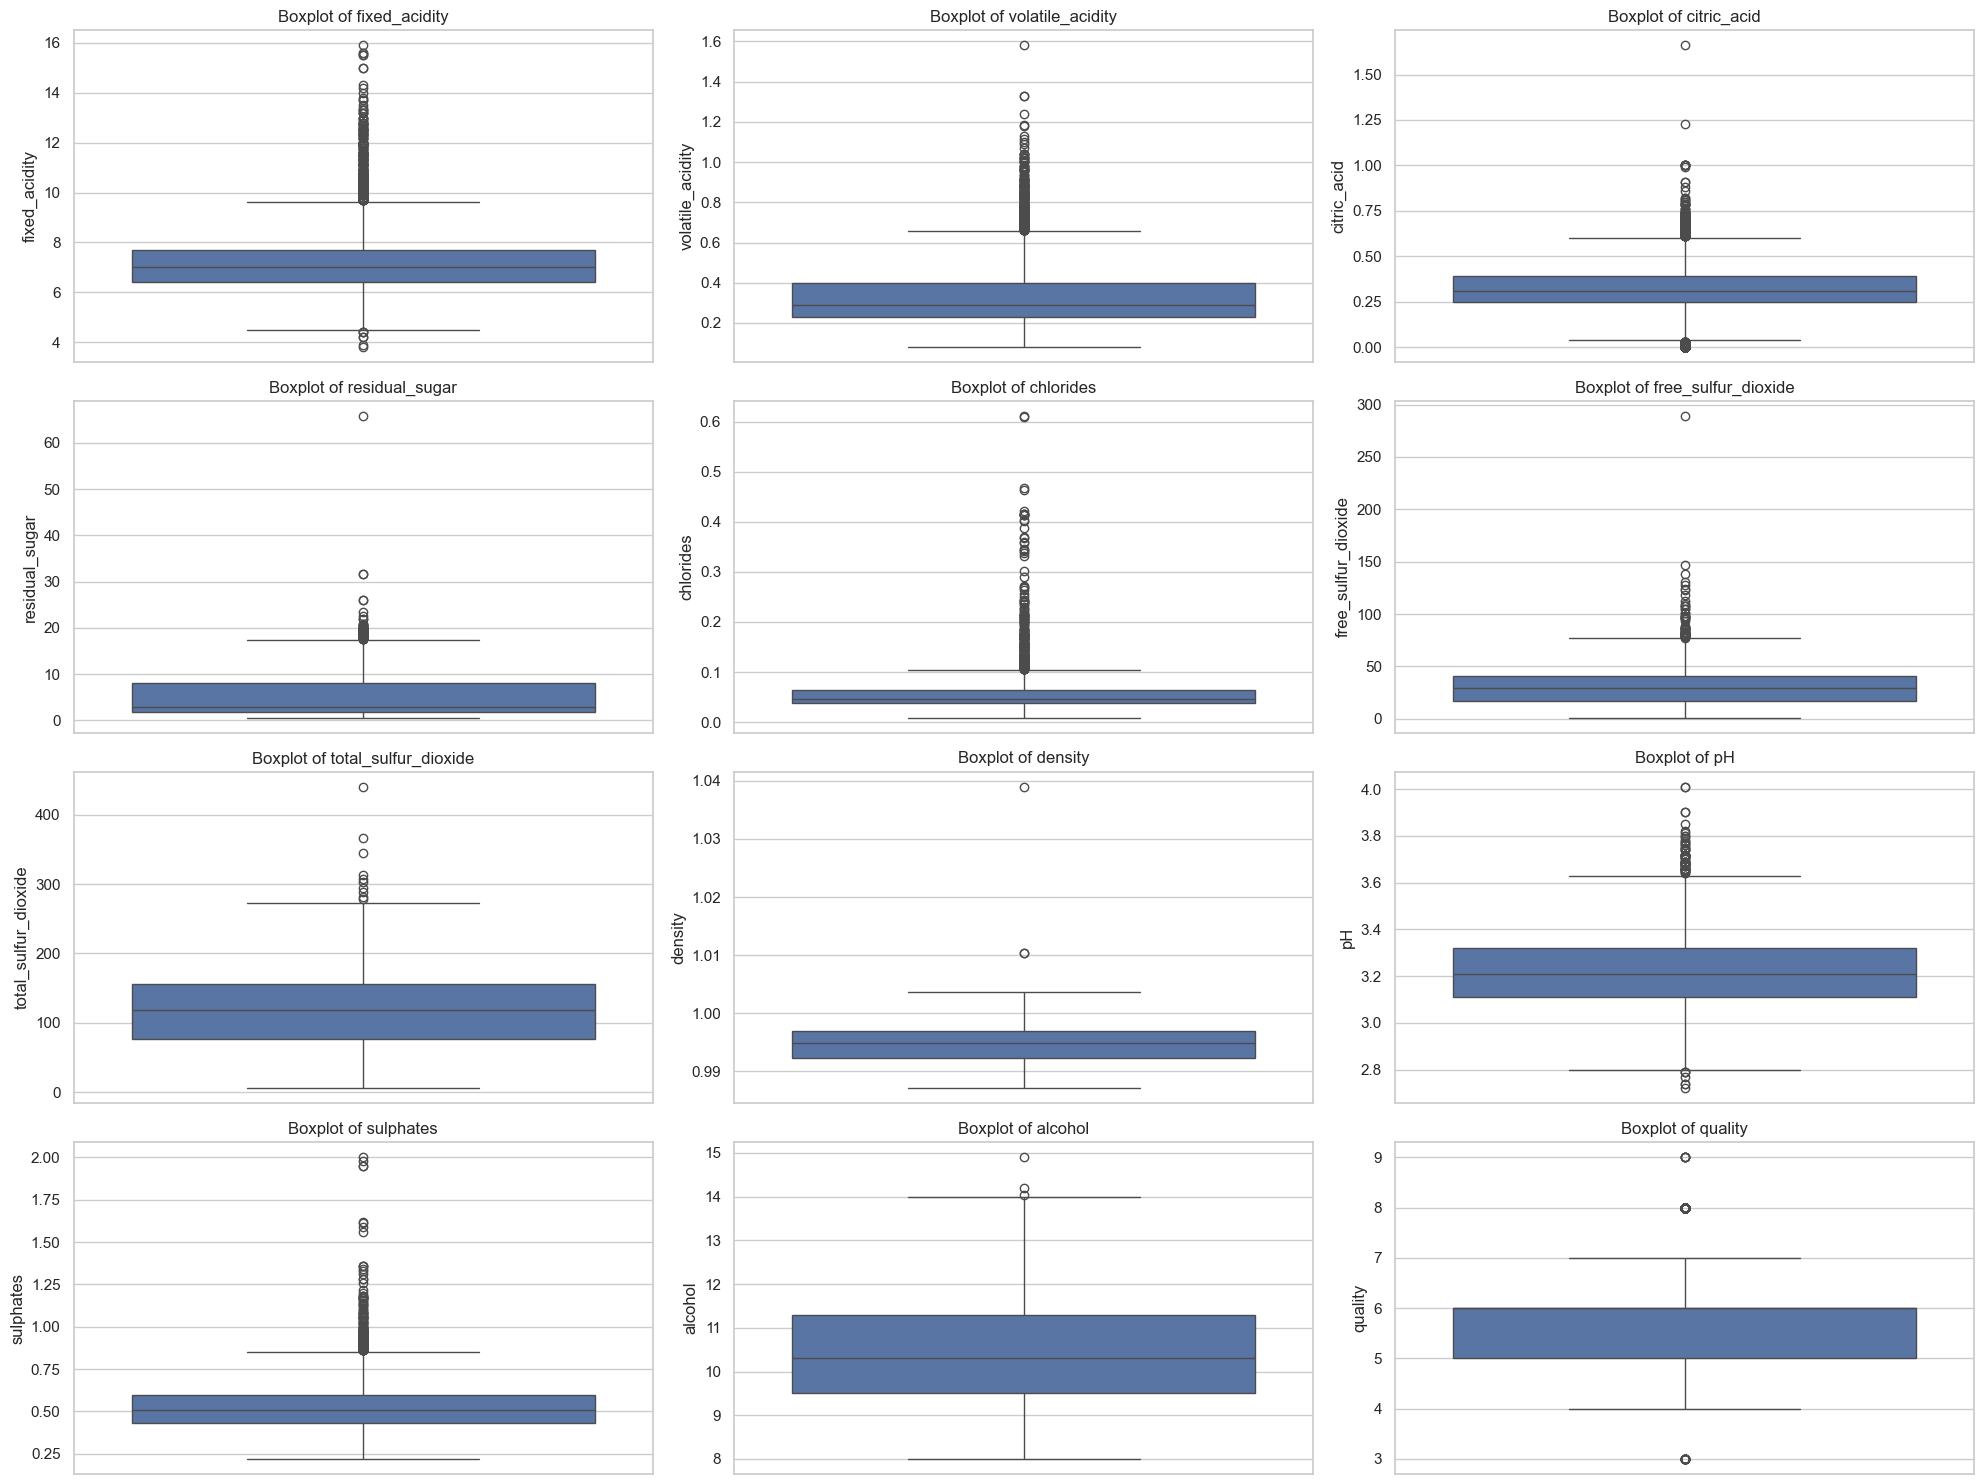

In [102]:
# Se visualizan los datos para identificar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [138]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 357
Valores atípicos eliminados en la columna 'volatile_acidity': 374
Valores atípicos eliminados en la columna 'citric_acid': 478
Valores atípicos eliminados en la columna 'residual_sugar': 37
Valores atípicos eliminados en la columna 'chlorides': 393
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 54
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 7
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 60
Valores atípicos eliminados en la columna 'sulphates': 141
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 178


In [139]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 94
Valores atípicos eliminados en la columna 'volatile_acidity': 165
Valores atípicos eliminados en la columna 'citric_acid': 90
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 125
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 18
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 8
Valores atípicos eliminados en la columna 'sulphates': 50
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 0


In [140]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 19
Valores atípicos eliminados en la columna 'volatile_acidity': 37
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 3
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 17
Valores atípicos eliminados en la columna 'sulphates': 54
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 0


In [141]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 0
Valores atípicos eliminados en la columna 'volatile_acidity': 27
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 3
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 0
Valores atípicos eliminados en la columna 'sulphates': 0
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 0


In [142]:
# Itera sobre cada columna (excepto la última)
for column in df_wine.columns[:-1][:12]:
    
    # Calcula el rango intercuartílico (IQR)
    Q1 = df_wine[column].quantile(0.25)
    Q3 = df_wine[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identifica los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_wine[(df_wine[column] < lower_bound) | (df_wine[column] > upper_bound)]

    # Elimina los valores atípicos de la columna
    df_wine = df_wine[(df_wine[column] >= lower_bound) & (df_wine[column] <= upper_bound)]

    print(f"Valores atípicos eliminados en la columna '{column}': {len(outliers)}")

Valores atípicos eliminados en la columna 'fixed_acidity': 0
Valores atípicos eliminados en la columna 'volatile_acidity': 0
Valores atípicos eliminados en la columna 'citric_acid': 0
Valores atípicos eliminados en la columna 'residual_sugar': 0
Valores atípicos eliminados en la columna 'chlorides': 0
Valores atípicos eliminados en la columna 'free_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'total_sulfur_dioxide': 0
Valores atípicos eliminados en la columna 'density': 0
Valores atípicos eliminados en la columna 'pH': 0
Valores atípicos eliminados en la columna 'sulphates': 0
Valores atípicos eliminados en la columna 'alcohol': 0
Valores atípicos eliminados en la columna 'quality': 0


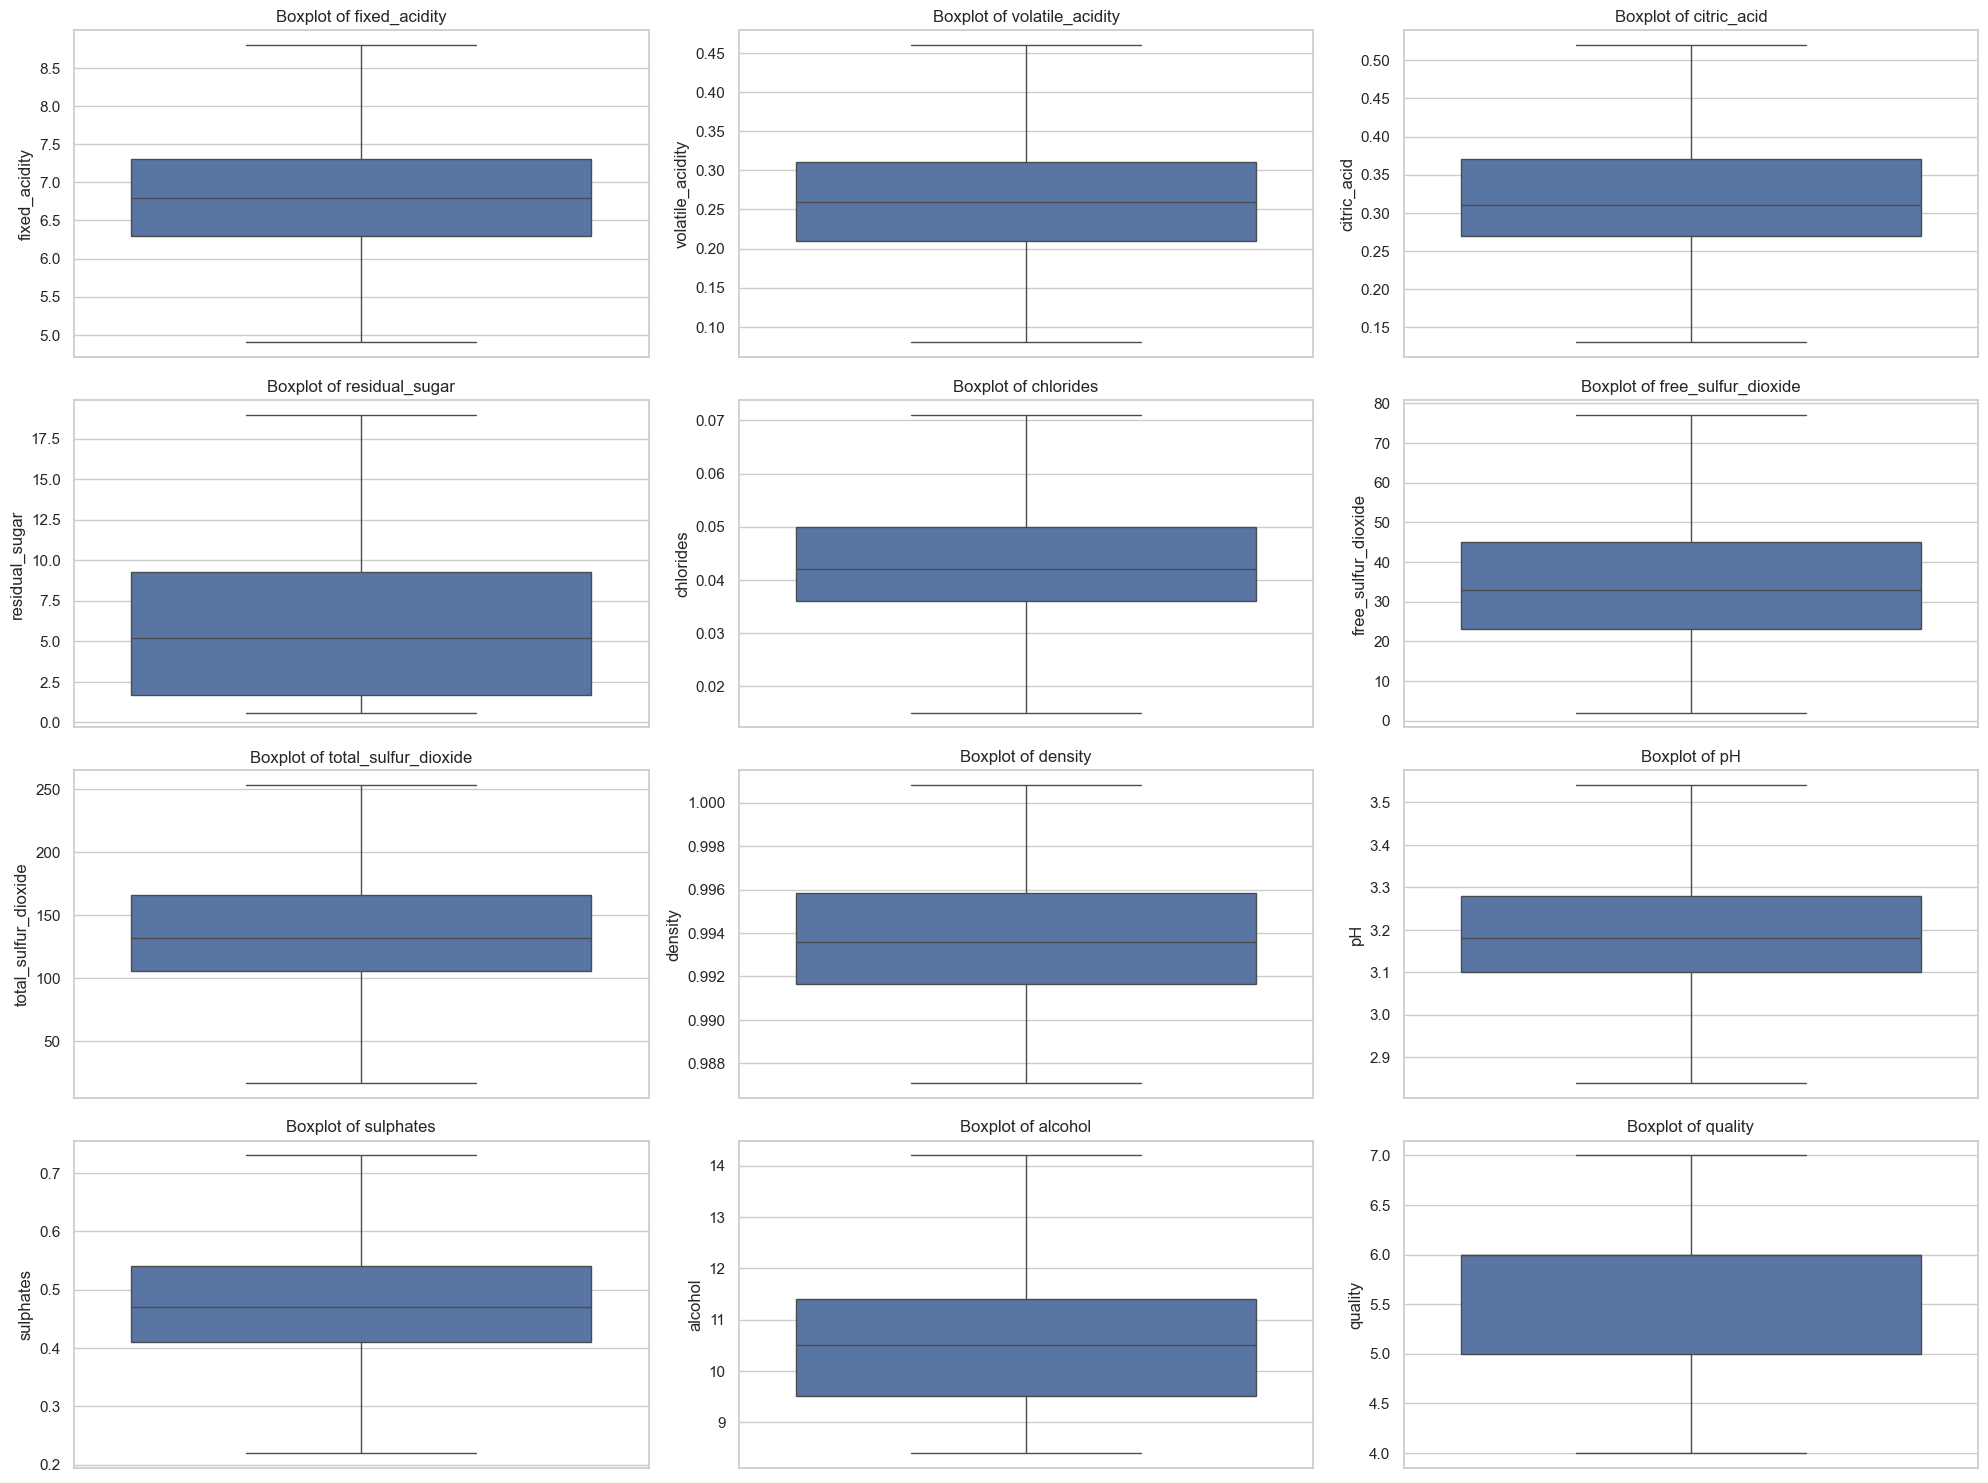

In [108]:
# Se visualizan los datos después de eliminar los valores atípicos.
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_wine.columns[:-1][:12], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df_wine, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

## Normalización de los Datos

In [143]:
# Normalización de las características
features = df_wine.drop('quality', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características normalizadas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df_wine['quality']
df_wine = df_scaled.dropna()

# Paso 4: Construcción del dataset

### Separación de variables dependientes e independientes

In [147]:
from keras.src.utils import to_categorical

y_data = df_wine['quality']
y_data = to_categorical(y_data)
X_data = df_wine.drop(columns=['quality'])

#  Dividir los datos en conjuntos de entrenamiento y pruebas (50% - 50%):
X_data_train1, X_data_test1, y_data_train1, y_data_test1 = train_test_split(X_data, y_data, test_size=0.5, random_state=2)
print(f'Proporción de entrenamiento 50%: {len(X_data_train1)} en entrenamiento  - Proporción de prueba 50%: {len(X_data_test1)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (60% - 40%):
X_data_train2, X_data_test2, y_data_train2, y_data_test2 = train_test_split(X_data, y_data, test_size=0.4, random_state=2)
print(f'Proporción de entrenamiento 60%: {len(X_data_train2)} en entrenamiento  - Proporción de prueba 40%: {len(X_data_test2)} muestras en prueba')


#  Dividir los datos en conjuntos de entrenamiento y pruebas (80% - 20%):
X_data_train3, X_data_test3, y_data_train3, y_data_test3 = train_test_split(X_data, y_data, test_size=0.2, random_state=2)
print(f'Proporción de entrenamiento 80%: {len(X_data_train3)} en entrenamiento - Proporción de prueba 20%: {len(X_data_test3)} muestras en prueba')

sc1 = StandardScaler()
sc2 = StandardScaler()
sc3 = StandardScaler()

# Estandarizar los datos
x_data_train1_scaled = sc1.fit_transform(X_data_train1)
x_data_test1_scaled = sc1.transform(X_data_test1)

x_data_train2_scaled = sc2.fit_transform(X_data_train2)
x_data_test2_scaled = sc2.transform(X_data_test2)

x_data_train3_scaled = sc3.fit_transform(X_data_train3)
x_data_test3_scaled = sc3.transform(X_data_test3)

Proporción de entrenamiento 50%: 760 en entrenamiento  - Proporción de prueba 50%: 760 muestras en prueba
Proporción de entrenamiento 60%: 912 en entrenamiento  - Proporción de prueba 40%: 608 muestras en prueba
Proporción de entrenamiento 80%: 1216 en entrenamiento - Proporción de prueba 20%: 304 muestras en prueba


In [148]:
X_data_train1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,color_white
3705,-0.436462,-0.317773,-1.614788,-1.050022,-0.167638,-0.290860,-0.593998,-0.469634,-1.463385,-0.214980,-0.990621,-0.118093,0.118093
3342,-0.843044,-0.585964,-0.509106,-0.841797,-0.266540,-0.694367,-0.260443,-0.768437,0.001442,-0.004457,-0.065464,-0.118093,0.118093
2468,-1.520681,-0.049581,-0.263399,-0.925087,-0.365443,-0.290860,-0.736949,-1.390943,2.125440,0.416590,1.616641,-0.118093,0.118093
2953,-0.843044,0.084515,-0.017692,0.011927,0.524679,0.852411,0.549617,-0.370033,0.147925,1.258683,0.355063,-0.118093,0.118093
1738,1.054339,0.620899,-0.631960,-0.092185,-0.662150,-0.761618,-0.641648,0.046156,1.100062,0.627113,0.355063,-0.118093,0.118093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,2.138558,0.620899,-0.140546,-1.102078,-2.145685,1.188667,0.287539,-1.237984,-1.902833,-1.688644,0.775589,-0.118093,0.118093
1941,1.460921,1.425474,-0.140546,-0.706450,-0.563247,-1.972140,-2.666800,-0.981867,0.001442,-1.267597,1.112010,-0.118093,0.118093
2208,0.105648,0.486803,0.473721,-1.112490,-0.563247,0.381652,0.478141,-1.486986,-0.804213,-1.267597,1.280220,-0.118093,0.118093
2257,-0.843044,-0.183677,0.719428,0.345088,0.227972,1.323170,1.717058,0.661548,-0.145041,-0.214980,-1.242937,-0.118093,0.118093


# **Paso 5: Elaboración del modelo**

## **Construcción del modelo**

### Modelo 1: Perceptrón

In [149]:
from keras import Sequential
from sklearn.linear_model import Perceptron
from keras.layers import Dense
def build_model_1():
    model = Sequential([
    Dense(units=y_data.shape[1], activation='elu')    
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

    

### Modelo 2: Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

In [150]:
y_data_train1.shape[1]

8

In [151]:
def build_model_2():
    model = tf.keras.models.Sequential()
    n_neurons = df_wine.shape[1] - 1
    model.add(tf.keras.layers.Dense(units=n_neurons, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

### Modelo 3: Red neuronal con dos capas oculta con dos neuronas en cada capa oculta.

In [152]:
def build_model_3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=2, activation='sigmoid', use_bias=True))
    model.add(tf.keras.layers.Dense(units=y_data.shape[1], activation='sigmoid', use_bias=True))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision(), tf.keras.metrics.F1Score()])
    return model

## **Entrenamiento de los modelos**

### Modelo 1

In [153]:
model_1_1 = build_model_1()
model_1_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0916 - f1_score: 0.0538 - loss: 5.8591 - precision_17: 0.1226 - recall_17: 0.3090 - val_accuracy: 0.0724 - val_f1_score: 0.0454 - val_loss: 6.2081 - val_precision_17: 0.1181 - val_recall_17: 0.2829
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0855 - f1_score: 0.0507 - loss: 6.1755 - precision_17: 0.1173 - recall_17: 0.2906 - val_accuracy: 0.0816 - val_f1_score: 0.0495 - val_loss: 6.0417 - val_precision_17: 0.1163 - val_recall_17: 0.2803
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0817 - f1_score: 0.0493 - loss: 5.9562 - precision_17: 0.1218 - recall_17: 0.3102 - val_accuracy: 0.0882 - val_f1_score: 0.0520 - val_loss: 6.0644 - val_precision_17: 0.1173 - val_recall_17: 0.2816
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1021 - f1_score: 0.0572 - loss: 5.8856 - precision_17: 0.1247 - recall_17: 0.3188 - val_accuracy: 0.0908 - val_f1_score: 0.0529 - val_loss: 6.350

In [154]:
model_1_2 = build_model_1()
model_1_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1227 - f1_score: 0.0620 - loss: 9.2076 - precision_18: 0.1077 - recall_18: 0.2640 - val_accuracy: 0.1546 - val_f1_score: 0.0758 - val_loss: 8.5598 - val_precision_18: 0.1288 - val_recall_18: 0.3092
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1281 - f1_score: 0.0603 - loss: 8.9234 - precision_18: 0.1091 - recall_18: 0.2656 - val_accuracy: 0.1612 - val_f1_score: 0.0800 - val_loss: 8.5681 - val_precision_18: 0.1327 - val_recall_18: 0.3125
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1385 - f1_score: 0.0675 - loss: 9.1145 - precision_18: 0.1112 - recall_18: 0.2662 - val_accuracy: 0.1628 - val_f1_score: 0.0823 - val_loss: 8.5810 - val_precision_18: 0.1358 - val_recall_18: 0.3174
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1569 - f1_score: 0.0722 - loss: 9.2751 - precision_18: 0.1196 - recall_18: 0.2849 - val_accuracy: 0.1661 - val_f1_score: 0.0823 - val_loss: 8.568

In [155]:
model_1_3 = build_model_1()
model_1_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1298 - f1_score: 0.0732 - loss: 8.0128 - precision_19: 0.1146 - recall_19: 0.2714 - val_accuracy: 0.1513 - val_f1_score: 0.0722 - val_loss: 8.4010 - val_precision_19: 0.1203 - val_recall_19: 0.2829
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1324 - f1_score: 0.0698 - loss: 7.1842 - precision_19: 0.1212 - recall_19: 0.2779 - val_accuracy: 0.1546 - val_f1_score: 0.0732 - val_loss: 8.7238 - val_precision_19: 0.1250 - val_recall_19: 0.2862
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1591 - f1_score: 0.0786 - loss: 7.6874 - precision_19: 0.1312 - recall_19: 0.2887 - val_accuracy: 0.1513 - val_f1_score: 0.0713 - val_loss: 8.7719 - val_precision_19: 0.1285 - val_recall_19: 0.2862
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1490 - f1_score: 0.0787 - loss: 8.0420 - precision_19: 0.1298 - recall_19: 0.2819 - val_accuracy: 0.1546 - val_f1_score: 0.0720 - val_loss: 8.8298

### Modelo 2

In [156]:
model_2_1 = build_model_2()
model_2_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1607 - f1_score: 0.0496 - loss: 2.0020 - precision_20: 0.1546 - recall_20: 0.8318 - val_accuracy: 0.2395 - val_f1_score: 0.0574 - val_loss: 1.9090 - val_precision_20: 0.1602 - val_recall_20: 0.8197
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2970 - f1_score: 0.0667 - loss: 1.8337 - precision_20: 0.1662 - recall_20: 0.8379 - val_accuracy: 0.2987 - val_f1_score: 0.0689 - val_loss: 1.7511 - val_precision_20: 0.1738 - val_recall_20: 0.8579
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3315 - f1_score: 0.0756 - loss: 1.6912 - precision_20: 0.1783 - recall_20: 0.8781 - val_accuracy: 0.3289 - val_f1_score: 0.0880 - val_loss: 1.6280 - val_precision_20: 0.1917 - val_recall_20: 0.9118
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3227 - f1_score: 0.0867 - loss: 1.5586 - precision_20: 0.1966 - recall_20: 0.9376 - val_accuracy: 0.3737 - val_f1_score: 0.1067 - val_loss: 1.531

In [157]:
model_2_2 = build_model_2()
model_2_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0049 - f1_score: 0.0055 - loss: 2.3769 - precision_21: 0.1055 - recall_21: 0.6454 - val_accuracy: 0.0296 - val_f1_score: 0.0232 - val_loss: 2.1608 - val_precision_21: 0.1345 - val_recall_21: 0.8224
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0626 - f1_score: 0.0401 - loss: 2.1192 - precision_21: 0.1375 - recall_21: 0.8234 - val_accuracy: 0.1316 - val_f1_score: 0.0605 - val_loss: 1.9427 - val_precision_21: 0.1783 - val_recall_21: 0.9424
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1658 - f1_score: 0.0701 - loss: 1.9004 - precision_21: 0.1867 - recall_21: 0.9471 - val_accuracy: 0.2368 - val_f1_score: 0.0882 - val_loss: 1.7711 - val_precision_21: 0.2133 - val_recall_21: 0.9704
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2462 - f1_score: 0.0913 - loss: 1.7371 - precision_21: 0.2201 - recall_21: 0.9760 - val_accuracy: 0.2829 - val_f1_score: 0.1040 - val_loss: 1.637

In [158]:
model_2_3 = build_model_2()
model_2_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0111 - f1_score: 0.0193 - loss: 2.5548 - precision_22: 0.0780 - recall_22: 0.4140 - val_accuracy: 0.0954 - val_f1_score: 0.0617 - val_loss: 2.2954 - val_precision_22: 0.0910 - val_recall_22: 0.4671
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1582 - f1_score: 0.0774 - loss: 2.1726 - precision_22: 0.1116 - recall_22: 0.5560 - val_accuracy: 0.2434 - val_f1_score: 0.0863 - val_loss: 2.0047 - val_precision_22: 0.1455 - val_recall_22: 0.6809
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2325 - f1_score: 0.0890 - loss: 1.9087 - precision_22: 0.1701 - recall_22: 0.7606 - val_accuracy: 0.2566 - val_f1_score: 0.0844 - val_loss: 1.7816 - val_precision_22: 0.2266 - val_recall_22: 0.9013
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2778 - f1_score: 0.0941 - loss: 1.7097 - precision_22: 0.2592 - recall_22: 0.9480 - val_accuracy: 0.2961 - val_f1_score: 0.0988 - val_loss: 1.613

### Modelo 3

In [159]:
model_3_1 = build_model_3()
model_3_1.fit(x_data_train1_scaled, y_data_train1, epochs=100, batch_size=32, validation_data=(x_data_test1_scaled, y_data_test1))

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 2.2419 - precision_23: 0.0648 - recall_23: 0.2981 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 2.2045 - val_precision_23: 0.0733 - val_recall_23: 0.3408
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 2.1911 - precision_23: 0.0798 - recall_23: 0.3597 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 2.1473 - val_precision_23: 0.0895 - val_recall_23: 0.3737
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0186 - f1_score: 0.0129 - loss: 2.1319 - precision_23: 0.0961 - recall_23: 0.3900 - val_accuracy: 0.0750 - val_f1_score: 0.0343 - val_loss: 2.0943 - val_precision_23: 0.1158 - val_recall_23: 0.4184
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1350 - f1_score: 0.0479 - loss: 2.0812 - precision_23: 0.1213 - recall_23: 0.4246 - val_accuracy: 0.2355 - val_f1

In [160]:
model_3_2 = build_model_3()
model_3_2.fit(x_data_train2_scaled, y_data_train2, epochs=100, batch_size=32, validation_data=(x_data_test2_scaled, y_data_test2))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1981 - f1_score: 0.0413 - loss: 2.0302 - precision_24: 0.1367 - recall_24: 0.6821 - val_accuracy: 0.2237 - val_f1_score: 0.0457 - val_loss: 1.9641 - val_precision_24: 0.1504 - val_recall_24: 0.7434
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1831 - f1_score: 0.0387 - loss: 1.9729 - precision_24: 0.1619 - recall_24: 0.8534 - val_accuracy: 0.2237 - val_f1_score: 0.0457 - val_loss: 1.9051 - val_precision_24: 0.1894 - val_recall_24: 0.9819
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1937 - f1_score: 0.0405 - loss: 1.9078 - precision_24: 0.1959 - recall_24: 0.9894 - val_accuracy: 0.2237 - val_f1_score: 0.0457 - val_loss: 1.8494 - val_precision_24: 0.2143 - val_recall_24: 0.9753
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2112 - f1_score: 0.0436 - loss: 1.8425 - precision_24: 0.2187 - recall_24: 0.9707 - val_accuracy: 0.2237 - val_f1_score: 0.0457 - val_loss: 1.796

In [161]:
model_3_3 = build_model_3()
model_3_3.fit(x_data_train3_scaled, y_data_train3, epochs=100, batch_size=32, validation_data=(x_data_test3_scaled, y_data_test3))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 2.1427 - precision_25: 0.1004 - recall_25: 0.3314 - val_accuracy: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_loss: 2.0917 - val_precision_25: 0.1297 - val_recall_25: 0.4901
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - f1_score: 0.0000e+00 - loss: 2.0596 - precision_25: 0.1411 - recall_25: 0.5575 - val_accuracy: 0.0033 - val_f1_score: 0.0042 - val_loss: 2.0051 - val_precision_25: 0.1713 - val_recall_25: 0.7632
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0441 - f1_score: 0.0252 - loss: 1.9754 - precision_25: 0.1774 - recall_25: 0.8211 - val_accuracy: 0.1316 - val_f1_score: 0.0344 - val_loss: 1.9251 - val_precision_25: 0.1954 - val_recall_25: 0.9770
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1824 - f1_score: 0.0432 - loss: 1.9053 - precision_25: 0.1955 - recall_25: 0.9774 - val_accuracy: 0.1842 - val_f1_score: 

## **Evaluación de los modelos**

### Rendimiento de proporciones del modelo #1 (Perceptrón)

### Rendimiento de proporciones del modelo #2 (Red neuronal con una capa oculta)

### Rendimiento de proporciones del modelo #3 (Red neuronal con dos capas ocultas)